# Reddit Wordclouds

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import spacy
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
nlp = spacy.load("en_core_web_lg")

#### Reading data into dataframes and extracting comments, body and title into csv file

In [3]:
df = pd.read_csv('../data/all/reddit_data_all.csv', index_col=0)
df.drop(0, axis=0, inplace=True)
df.head()

,id,title,score,comms_num,comments,search_topic,body,date
1,imkf0n,UBIT is safe,518,7,"['This made my day, thank you', 'COVID-19: *”g...",UBreddit,NaN,2020-09-04 17:34:30
2,ijhhd5,WEEK ONE!!! REMEMBER TO WEAR YOUR MASKS AND PO...,472,16,['It’s not a new school week until Mr Krabs sa...,UBreddit,NaN,2020-08-30 18:17:02
3,f8019t,What the last 2 minutes of lecture looks like ...,472,21,"['my dude how long did this take lol', 'Is tha...",UBreddit,NaN,2020-02-22 22:30:28
4,dzmrbc,The SU Bull today,444,45,['FYI: Do not malign Chinese students holding ...,UBreddit,NaN,2019-11-21 17:35:56
5,ex5bsz,Logging into MyUB be like.,442,27,"[""Since this semester started, it's been havin...",UBreddit,NaN,2020-02-01 12:15:53


#### Word Cloud generater function

In [4]:
def generate_wordcloud(text, stopwords=None):
    wordcloud = WordCloud(collocations=True,
                          width=1600,
                          height=1000,
                          colormap='Accent',
                          background_color='black',
                          stopwords=stopwords).generate(text)
    plt.figure(figsize=[20,15])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

#### Title

In [5]:
title_list = []
for title in df['title']:
    for token in nlp(title):
        if token.is_punct==False and token.is_stop==False and token.is_alpha==True and token.pos_ in ['NOUN', 'PROPN']:
            title_list.append((token.lemma_).lower())
title_text = ' '.join(title_list)

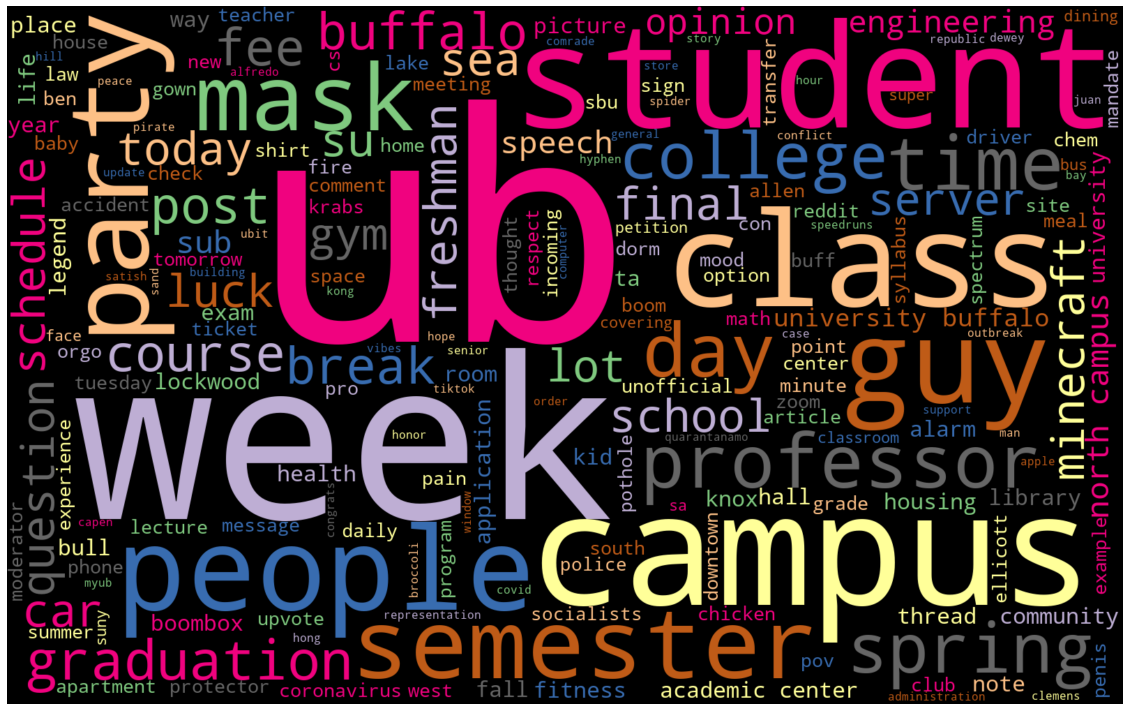

In [6]:
generate_wordcloud(title_text)

#### Comments

In [7]:
comment_list = []
for comments in df.comments:
    for comment in comments.split("', '"):
        for token in nlp(comment):
            if token.is_punct==False and token.is_stop==False and token.pos_ in ['NOUN', 'PROPN'] and token.is_alpha==True:
                comment_list.append((token.lemma_).lower())
comment_text = ' '.join(comment_list)

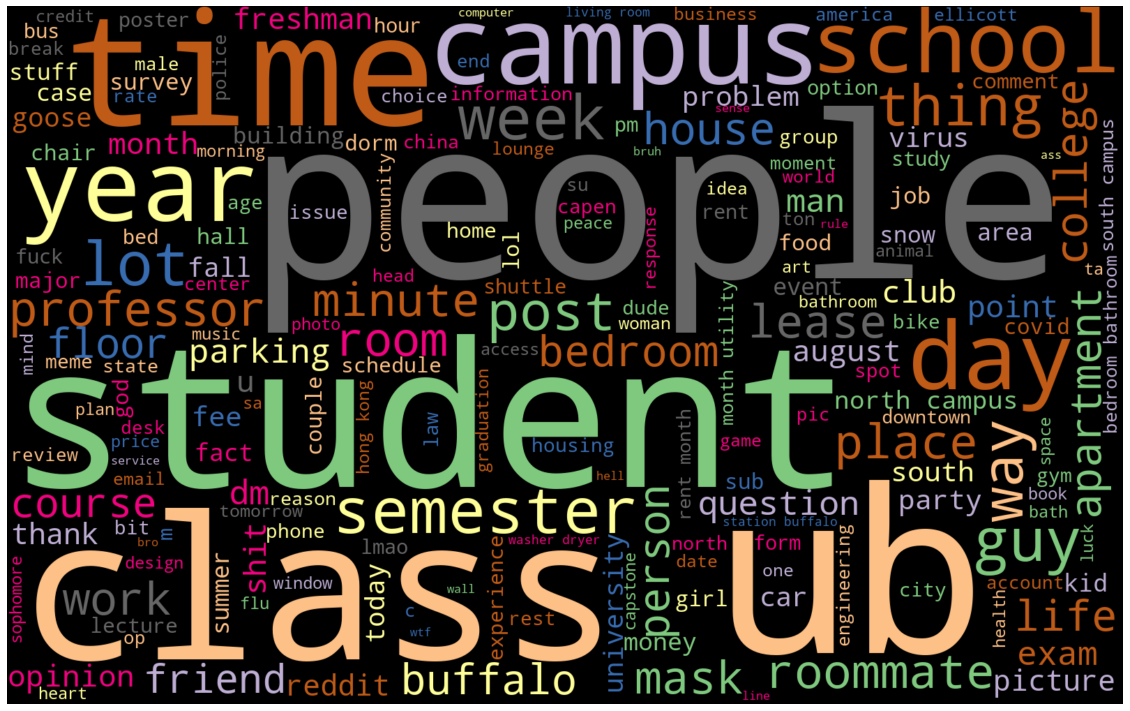

In [8]:
generate_wordcloud(comment_text)

### Using Style Cloud library

In [9]:
complete_text = title_text+''+comment_text

In [14]:
import stylecloud
stylecloud.gen_stylecloud(text=complete_text, 
                          size=2048,
                          icon_name='fab fa-reddit-square',
                          output_name='../wordclouds/reddit_4.png',
                         custom_stopwords=['shit', 'fuck'],
                         max_font_size=220,
                         max_words=2000,
                         background_color='black')